In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  49.813290  51.835709  47.800831  49.982655  49.982655  44871361
1  2004-08-20  50.316402  54.336334  50.062355  53.952770  53.952770  22942874
2  2004-08-23  55.168217  56.528118  54.321388  54.495735  54.495735  18342897
3  2004-08-24  55.412300  55.591629  51.591621  52.239197  52.239197  15319808
4  2004-08-25  52.284027  53.798351  51.746044  52.802086  52.802086   9232276


Text(0.5, 1.0, 'closing price')

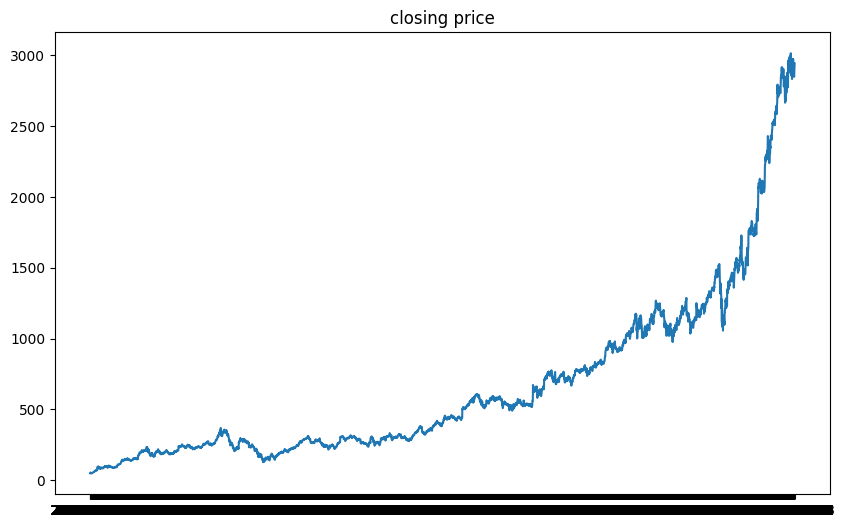

In [2]:
df = pd.read_csv('/Users/moonbansal/Downloads/4-1/TIME SERIES/google_data.csv')
print(df.head())
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label = 'GOOG closing price')
plt.title('closing price')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

adf_test = adfuller(df['Close'])
print(adf_test)

(np.float64(4.812468734209559), 1.0, 26, 4342, {'1%': np.float64(-3.4318569484508696), '5%': np.float64(-2.8622058860549227), '10%': np.float64(-2.5671244557662125)}, np.float64(35302.57133327809))


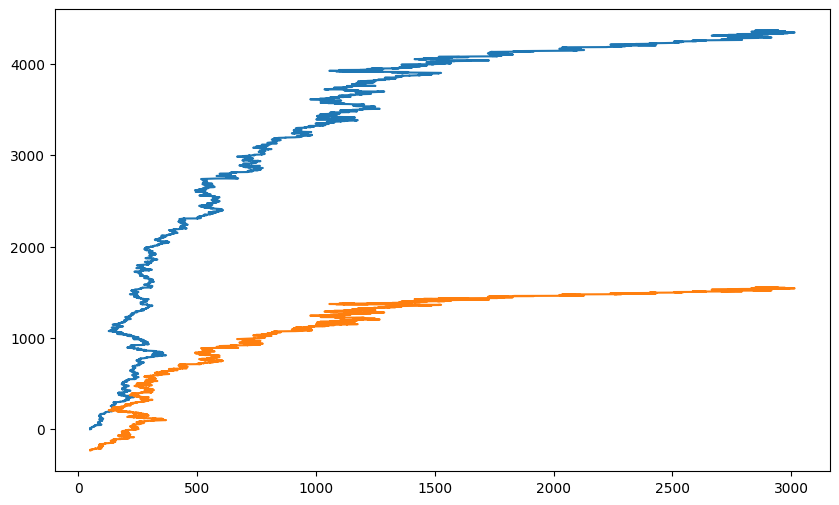

In [4]:
goog_close = df['Close']

goog_close = goog_close.dropna()
time_index = pd.Series(range(len(goog_close)), index=goog_close.index)

X = sm.add_constant(time_index)

model = sm.OLS(goog_close, X)
result = model.fit()

plt.figure(figsize = (10,6))
plt.plot(goog_close, time_index)
plt.plot(goog_close, result.fittedvalues)
plt.show()

         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  49.813290  51.835709  47.800831  49.982655  49.982655  44871361
1  2004-08-20  50.316402  54.336334  50.062355  53.952770  53.952770  22942874
2  2004-08-23  55.168217  56.528118  54.321388  54.495735  54.495735  18342897
3  2004-08-24  55.412300  55.591629  51.591621  52.239197  52.239197  15319808
4  2004-08-25  52.284027  53.798351  51.746044  52.802086  52.802086   9232276


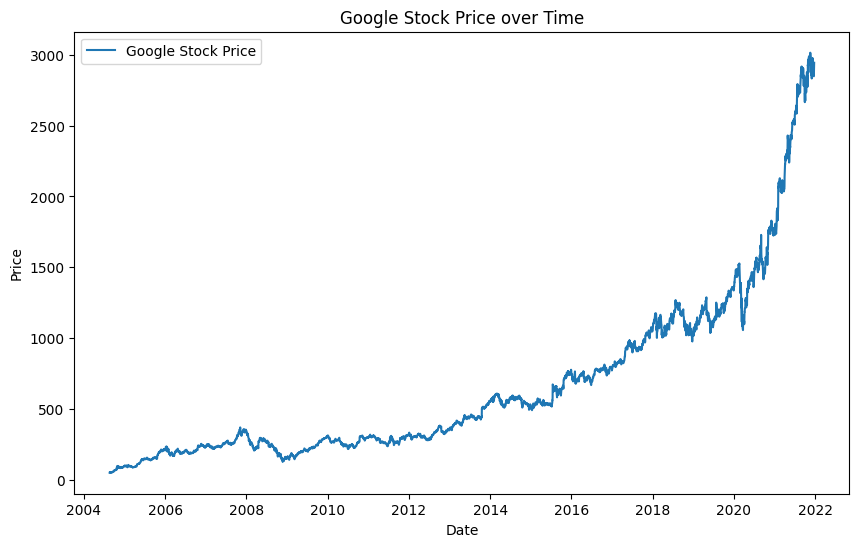

ADF Statistic: 4.812468734209559
p-value: 1.0
Critical Values:
   1%: -3.4318569484508696
   5%: -2.8622058860549227
   10%: -2.5671244557662125
The time series is non-stationary (fail to reject null hypothesis)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the Google stock data (Assuming the CSV file is named 'google_stock_data.csv')
# Replace with the actual file path from Kaggle
df = pd.read_csv('/Users/moonbansal/Downloads/4-1/TIME SERIES/google_data.csv')

# Display the first few rows to understand the structure
print(df.head())

# Assuming the 'Date' column is the index, and 'Close' represents the stock price
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot the stock price data (Close price)
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Google Stock Price')
plt.title('Google Stock Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Perform ADF test on the 'Close' price to check for stationarity
result = adfuller(df['Close'])

# Extracting the ADF test result
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Display the results
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpretation
if p_value < 0.05:
    print("The time series is stationary (reject null hypothesis)")
else:
    print("The time series is non-stationary (fail to reject null hypothesis)")

#Based on the p-value, we determine if the time series is stationary or not. A p-value less than 0.05 indicates that the series is stationary (reject the null hypothesis of non-stationarity).
# Null Hypothesis: The time series has a unit root (it is non-stationary).
# If the p-value is less than 0.05, the null hypothesis is rejected, implying the time series is stationary.